In [1]:
import pandas as pd

C:\Users\91705\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('recipes.csv')

# Display the first few rows of the dataframe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [4]:
# Dropping the specified columns
columns_to_delete = [
    "PrepTime", 
    "TotalTime", 
    "DatePublished", 
    "AggregatedRating", 
    "ReviewCount", 
    "RecipeServings", 
    "RecipeYield",
    "AuthorId",
    "AuthorName",
    "RecipeIngredientQuantities",
    "SaturatedFatContent"
]

df = df.drop(columns=columns_to_delete)

# Verifying the updated dataframe structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               522517 non-null  int64  
 1   Name                   522517 non-null  object 
 2   CookTime               439972 non-null  object 
 3   Description            522512 non-null  object 
 4   Images                 522516 non-null  object 
 5   RecipeCategory         521766 non-null  object 
 6   Keywords               505280 non-null  object 
 7   RecipeIngredientParts  522517 non-null  object 
 8   Calories               522517 non-null  float64
 9   FatContent             522517 non-null  float64
 10  CholesterolContent     522517 non-null  float64
 11  SodiumContent          522517 non-null  float64
 12  CarbohydrateContent    522517 non-null  float64
 13  FiberContent           522517 non-null  float64
 14  SugarContent           522517 non-nu

In [5]:
df = df.dropna(subset=['Description',])

# Display the updated DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 522512 entries, 0 to 522516
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               522512 non-null  int64  
 1   Name                   522512 non-null  object 
 2   CookTime               439972 non-null  object 
 3   Description            522512 non-null  object 
 4   Images                 522512 non-null  object 
 5   RecipeCategory         521761 non-null  object 
 6   Keywords               505275 non-null  object 
 7   RecipeIngredientParts  522512 non-null  object 
 8   Calories               522512 non-null  float64
 9   FatContent             522512 non-null  float64
 10  CholesterolContent     522512 non-null  float64
 11  SodiumContent          522512 non-null  float64
 12  CarbohydrateContent    522512 non-null  float64
 13  FiberContent           522512 non-null  float64
 14  SugarContent           522512 non-null  f

In [6]:
# Drop rows where the 'Keywords' column is NaN
df = df.dropna(subset=['Keywords'])

# Display the updated DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 505275 entries, 0 to 522516
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               505275 non-null  int64  
 1   Name                   505275 non-null  object 
 2   CookTime               424554 non-null  object 
 3   Description            505275 non-null  object 
 4   Images                 505275 non-null  object 
 5   RecipeCategory         505275 non-null  object 
 6   Keywords               505275 non-null  object 
 7   RecipeIngredientParts  505275 non-null  object 
 8   Calories               505275 non-null  float64
 9   FatContent             505275 non-null  float64
 10  CholesterolContent     505275 non-null  float64
 11  SodiumContent          505275 non-null  float64
 12  CarbohydrateContent    505275 non-null  float64
 13  FiberContent           505275 non-null  float64
 14  SugarContent           505275 non-null  f

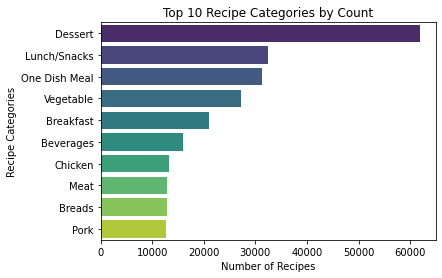

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = df['RecipeCategory'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title("Top 10 Recipe Categories by Count")
plt.xlabel("Number of Recipes")
plt.ylabel("Recipe Categories")
plt.show()


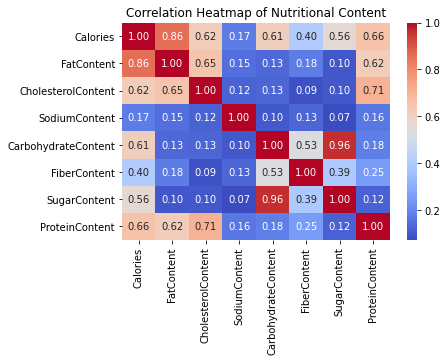

In [8]:
numeric_columns = ['Calories', 'FatContent', 'CholesterolContent', 'SodiumContent',
                   'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Nutritional Content")
plt.show()


In [9]:
invalid_cook_times = df[~df['CookTime'].str.startswith('PT', na=False)]
print(invalid_cook_times['CookTime'].unique())

[nan]


In [10]:
# Drop rows with invalid CookTime values
df = df[df['CookTime'].str.startswith('PT', na=False)]

In [11]:
# Convert the CookTime values to a timedelta object
df['CookTime'] = pd.to_timedelta(df['CookTime'], errors='coerce')

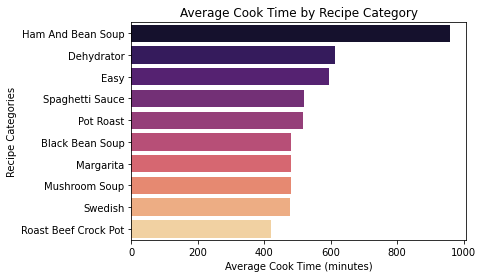

In [12]:
avg_cook_time = df.groupby('RecipeCategory')['CookTime'].mean().sort_values(ascending=False).head(10)
avg_cook_time = avg_cook_time.dt.total_seconds() / 60  # Convert to minutes

sns.barplot(x=avg_cook_time.values, y=avg_cook_time.index, palette="magma")
plt.title("Average Cook Time by Recipe Category")
plt.xlabel("Average Cook Time (minutes)")
plt.ylabel("Recipe Categories")
plt.show()


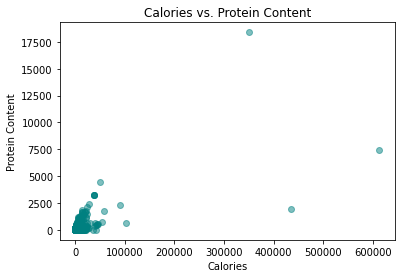

In [13]:
plt.scatter(df['Calories'], df['ProteinContent'], alpha=0.5, color="teal")
plt.title("Calories vs. Protein Content")
plt.xlabel("Calories")
plt.ylabel("Protein Content")
plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424554 entries, 0 to 522516
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   RecipeId               424554 non-null  int64          
 1   Name                   424554 non-null  object         
 2   CookTime               424050 non-null  timedelta64[ns]
 3   Description            424554 non-null  object         
 4   Images                 424554 non-null  object         
 5   RecipeCategory         424554 non-null  object         
 6   Keywords               424554 non-null  object         
 7   RecipeIngredientParts  424554 non-null  object         
 8   Calories               424554 non-null  float64        
 9   FatContent             424554 non-null  float64        
 10  CholesterolContent     424554 non-null  float64        
 11  SodiumContent          424554 non-null  float64        
 12  CarbohydrateContent    424554 non-n

In [15]:
df.sample(5)

,RecipeId,Name,CookTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
460992,477995,Bacon and Cheese Custards,0 days 00:50:00,Make and share this Bacon and Cheese Custards ...,character(0),Pork,"c(""Meat"", ""Brunch"", ""< 4 Hours"")","c(""red bell pepper"", ""garlic cloves"", ""green o...",136.4,7.4,110.2,252.5,6.2,0.4,5.0,11.1,"c(""Preheat oven to 350 degrees F; spray 6 rame..."
416549,431857,Poulet Au Verjus With Tomatoes,0 days 00:45:00,I love verjus and here is another simple chick...,character(0),Chicken,"c(""Poultry"", ""Meat"", ""European"", ""< 60 Mins"")","c(""whole chickens"", ""flour"", ""olive oil"", ""but...",774.5,54.2,204.2,340.5,21.2,1.5,3.1,48.6,"c(""Season chicken pieces with salt and pepper ..."
163595,171286,Cheesy Sausage Potatoes,0 days 00:15:00,Make and share this Cheesy Sausage Potatoes re...,character(0),Breakfast,"c(""Pork"", ""Potato"", ""Cheese"", ""Vegetable"", ""Me...","c(""potatoes"", ""bulk pork sausage"", ""onion"", ""b...",626.5,36.1,130.9,357.7,42.0,5.2,2.8,33.6,"c(""Place potatoes in a large saucepan and cove..."
226136,235633,Asian Chickpea Mix,0 days 01:45:00,From the LCBO's spring Food and Drink...delish...,character(0),Beans,"c(""Asian"", ""Vegan"", ""Summer"", ""< 4 Hours"")","c(""dried garbanzo beans"", ""lemongrass"", ""green...",431.8,14.2,0.0,528.3,62.0,17.3,17.9,19.4,"c(""Pick over chickpeas and rinse."", ""Bring 8 c..."
296486,308024,Barszcz Z Uszkami (Beet Soup With Mushroom Poc...,0 days 00:30:00,This is a wonderful take on the traditional bo...,character(0),Vegetable,"c(""European"", ""< 60 Mins"")","c(""beetroot"", ""carrots"", ""celery"", ""apples"", ""...",234.7,3.6,40.3,215.0,46.9,7.9,20.4,7.3,"c(""For the soup: put the beetroot, carrots, pa..."


            Calories     FatContent  CholesterolContent  SodiumContent  \
count  424554.000000  424554.000000       424554.000000  424554.000000   
mean      501.285803      25.175029           93.471548     747.113993   
std      1507.249315     120.940741          327.730608    3242.620158   
min         0.000000       0.000000            0.000000       0.000000   
25%       189.800000       6.400000            9.500000     147.700000   
50%       333.200000      14.400000           51.600000     382.700000   
75%       542.900000      28.000000          115.700000     822.500000   
max    612854.600000   64368.100000       130456.400000  704129.600000   

       CarbohydrateContent   FiberContent   SugarContent  ProteinContent  
count        424554.000000  424554.000000  424554.000000   424554.000000  
mean             51.015751       3.921166      21.951548       18.784898  
std             195.472254       8.887670     154.211925       42.930964  
min               0.000000       

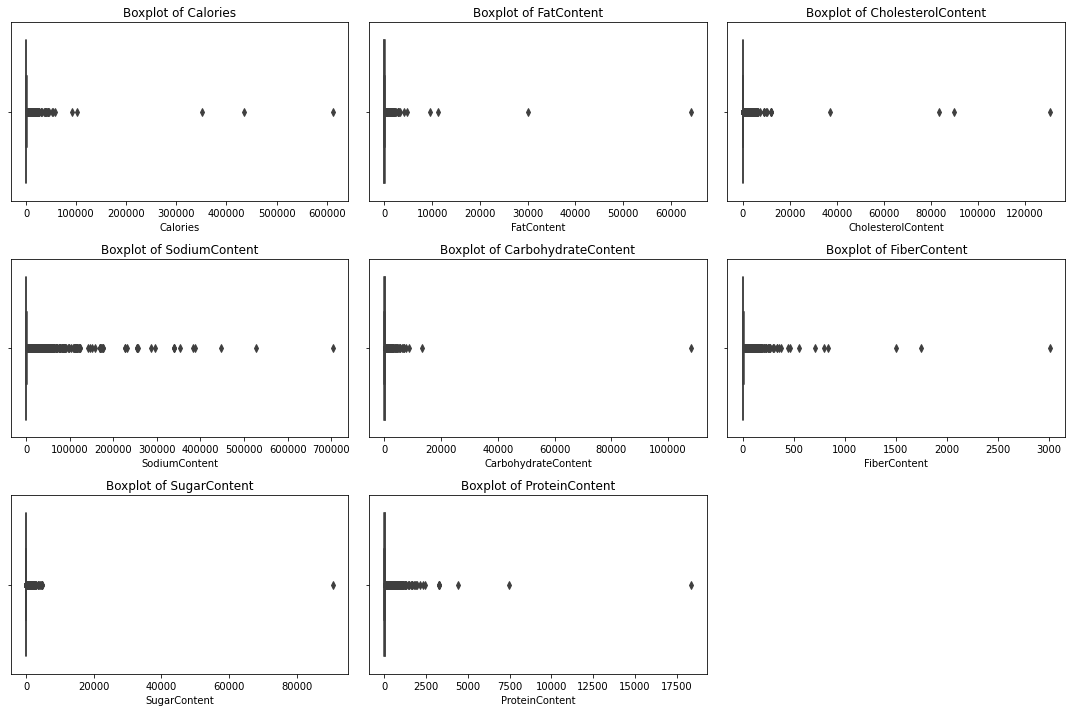

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
columns_of_interest = [
    'Calories', 'FatContent', 
    'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 
    'FiberContent', 'SugarContent', 'ProteinContent'
]

# Calculate statistical details
stats = df[columns_of_interest].describe(percentiles=[.25, .5, .75])

# Display the statistics
print(stats)

# Create boxplots for each column to visualize distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


            Calories     FatContent  CholesterolContent  SodiumContent  \
count  281278.000000  281278.000000       281278.000000  281278.000000   
mean      270.750250      13.561343           51.833757     398.338306   
std       163.193567      11.063064           52.654301     358.251665   
min         0.000000       0.000000            0.000000       0.000000   
25%       144.800000       5.000000            6.700000     111.300000   
50%       244.900000      10.800000           36.000000     288.100000   
75%       370.600000      19.500000           81.700000     601.600000   
max      1071.000000      52.700000          231.100000    1538.100000   

       CarbohydrateContent   FiberContent   SugarContent  ProteinContent  
count        281278.000000  281278.000000  281278.000000   281278.000000  
mean             25.423827       2.299970       7.858638       12.143593  
std              18.247737       1.980541       8.057446       11.716520  
min               0.000000       

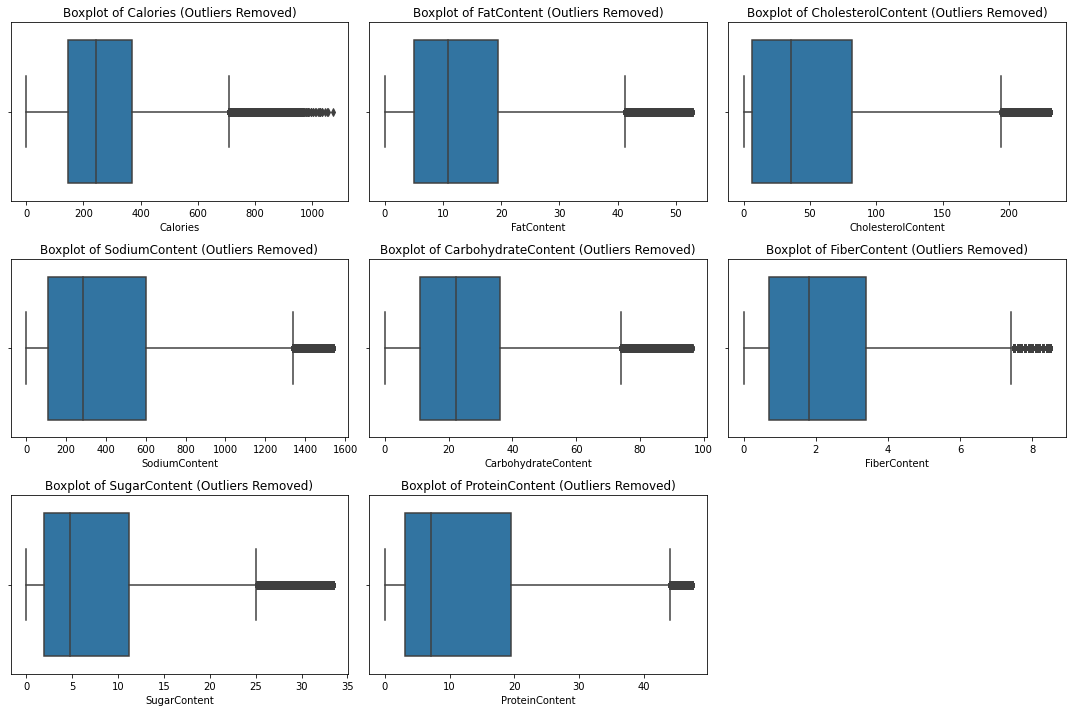

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns to check
columns_of_interest = [
    'Calories', 'FatContent', 
    'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 
    'FiberContent', 'SugarContent', 'ProteinContent'
]

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the dataset
df_no_outliers = remove_outliers(df, columns_of_interest)

# Calculate the new statistics after removing outliers
stats_no_outliers = df_no_outliers[columns_of_interest].describe(percentiles=[.25, .5, .75])

# Display the new statistics
print(stats_no_outliers)

# Create boxplots for each column after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.tight_layout()
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424554 entries, 0 to 522516
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   RecipeId               424554 non-null  int64          
 1   Name                   424554 non-null  object         
 2   CookTime               424050 non-null  timedelta64[ns]
 3   Description            424554 non-null  object         
 4   Images                 424554 non-null  object         
 5   RecipeCategory         424554 non-null  object         
 6   Keywords               424554 non-null  object         
 7   RecipeIngredientParts  424554 non-null  object         
 8   Calories               424554 non-null  float64        
 9   FatContent             424554 non-null  float64        
 10  CholesterolContent     424554 non-null  float64        
 11  SodiumContent          424554 non-null  float64        
 12  CarbohydrateContent    424554 non-n

In [19]:
# Define the columns to process
columns_of_interest = [
    'Calories', 'FatContent', 'CholesterolContent', 
    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 
    'SugarContent', 'ProteinContent'
]

# Function to categorize content level
def categorize_level(value, Q1, Q2, Q3):
    # Apply conditions based on quartiles
    if value <= Q1:
        return 1  # Very low
    elif value <= Q2:
        return 2  # Low
    elif value <= Q3:
        return 3  # Medium
    else:
        return 4  # High

# Calculate the quartiles for each column of interest
quartiles = {}
for col in columns_of_interest:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    quartiles[col] = (Q1, Q2, Q3)

# Apply the categorization to each column and create new columns
for col in columns_of_interest:
    Q1, Q2, Q3 = quartiles[col]
    df[f'{col}_Level'] = df[col].apply(categorize_level, args=(Q1, Q2, Q3))

# Show a sample of the new columns
df[['Calories', 'Calories_Level', 'FatContent', 'FatContent_Level']].head()


,Calories,Calories_Level,FatContent,FatContent_Level
0,170.9,1,2.5,1
1,1110.7,4,58.8,4
2,311.1,2,0.2,1
3,536.1,3,24.0,3
4,103.6,1,0.4,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424554 entries, 0 to 522516
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   RecipeId                   424554 non-null  int64          
 1   Name                       424554 non-null  object         
 2   CookTime                   424050 non-null  timedelta64[ns]
 3   Description                424554 non-null  object         
 4   Images                     424554 non-null  object         
 5   RecipeCategory             424554 non-null  object         
 6   Keywords                   424554 non-null  object         
 7   RecipeIngredientParts      424554 non-null  object         
 8   Calories                   424554 non-null  float64        
 9   FatContent                 424554 non-null  float64        
 10  CholesterolContent         424554 non-null  float64        
 11  SodiumContent              424554 non-null  

In [21]:
pip install transformers datasets torch


Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)


  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 202, in __init__
    raise InvalidVersion(f"Invalid version: '{version}'")
pip._vendor.packaging.version.InvalidVersion: Invalid version: '4.0.0-unsupported'


In [22]:

# Combine relevant columns into a text column for training
df['Text'] = df['Name'] + " " + df['Description'] + " " + df['Keywords']

# Display the first few rows to verify the combination
print(df[['Name', 'Description', 'Keywords', 'Text']].head())



                                Name  \
0  Low-Fat Berry Blue Frozen Dessert   
1                            Biryani   
2                      Best Lemonade   
3     Carina's Tofu-Vegetable Kebabs   
4                       Cabbage Soup   

                                         Description  \
0  Make and share this Low-Fat Berry Blue Frozen ...   
1  Make and share this Biryani recipe from Food.com.   
2  This is from one of my  first Good House Keepi...   
3  This dish is best prepared a day in advance to...   
4  Make and share this Cabbage Soup recipe from F...   

                                            Keywords  \
0  c("Dessert", "Low Protein", "Low Cholesterol",...   
1  c("Chicken Thigh & Leg", "Chicken", "Poultry",...   
2  c("Low Protein", "Low Cholesterol", "Healthy",...   
3  c("Beans", "Vegetable", "Low Cholesterol", "We...   
4  c("Low Protein", "Vegan", "Low Cholesterol", "...   

                                                Text  
0  Low-Fat Berry Blue Frozen D

In [23]:
# pip install sentencepiece
# pip install accelerate
# pip install torch torchvision torchaudio
# pip install --upgrade transformers accelerate torch

In [24]:
df.head()

,RecipeId,Name,CookTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,...,RecipeInstructions,Calories_Level,FatContent_Level,CholesterolContent_Level,SodiumContent_Level,CarbohydrateContent_Level,FiberContent_Level,SugarContent_Level,ProteinContent_Level,Text
0,38,Low-Fat Berry Blue Frozen Dessert,1 days 00:00:00,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,...,"c(""Toss 2 cups berries with sugar."", ""Let stan...",1,1,1,1,3,3,4,1,Low-Fat Berry Blue Frozen Dessert Make and sha...
1,39,Biryani,0 days 00:25:00,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,...,"c(""Soak saffron in warm milk for 5 minutes and...",4,4,4,2,4,4,4,4,Biryani Make and share this Biryani recipe fro...
2,40,Best Lemonade,0 days 00:05:00,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,...,"c(""Into a 1 quart Jar with tight fitting lid, ...",2,1,1,1,4,1,4,1,Best Lemonade This is from one of my first Go...
3,41,Carina's Tofu-Vegetable Kebabs,0 days 00:20:00,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,...,"c(""Drain the tofu, carefully squeezing out exc...",3,3,1,4,4,4,4,4,Carina's Tofu-Vegetable Kebabs This dish is be...
4,42,Cabbage Soup,0 days 00:30:00,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,...,"c(""Mix everything together and bring to a boil...",1,1,1,4,2,4,3,2,Cabbage Soup Make and share this Cabbage Soup ...


In [25]:
import pandas as pd

# Sample data loading (replace this with your actual DataFrame)
# df = pd.read_csv("your_dataset.csv") 

# Define the mapping of numbers to labels
value_mapping = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# List of columns to transform
columns_to_replace = [
    "Calories_Level",
    "FatContent_Level",
    "CholesterolContent_Level",
    "SodiumContent_Level",
    "CarbohydrateContent_Level",
    "FiberContent_Level",
    "SugarContent_Level",
    "ProteinContent_Level"
]

# Replace numerical values with labels
for column in columns_to_replace:
    df[column] = df[column].replace(value_mapping)

# Display the updated DataFrame
print(df.head())

   RecipeId                               Name        CookTime  \
0        38  Low-Fat Berry Blue Frozen Dessert 1 days 00:00:00   
1        39                            Biryani 0 days 00:25:00   
2        40                      Best Lemonade 0 days 00:05:00   
3        41     Carina's Tofu-Vegetable Kebabs 0 days 00:20:00   
4        42                       Cabbage Soup 0 days 00:30:00   

                                         Description  \
0  Make and share this Low-Fat Berry Blue Frozen ...   
1  Make and share this Biryani recipe from Food.com.   
2  This is from one of my  first Good House Keepi...   
3  This dish is best prepared a day in advance to...   
4  Make and share this Cabbage Soup recipe from F...   

                                              Images   RecipeCategory  \
0  c("https://img.sndimg.com/food/image/upload/w_...  Frozen Desserts   
1  c("https://img.sndimg.com/food/image/upload/w_...   Chicken Breast   
2  c("https://img.sndimg.com/food/image/upload/

In [26]:
import pandas as pd
import re

# Mappings for different content levels
content_mappings = {
    "Calories_Level": {
        "Low": "Low calories",
        "Medium": "Medium calories",
        "High": "High calories",
        "Very High": "Very High calories"
    },
    "FatContent_Level": {
        "Low": "Low Fat",
        "Medium": "Medium Fat",
        "High": "High Fat",
        "Very High": "Very High Fat"
    },
    "CholesterolContent_Level": {
        "Low": "Low Cholesterol",
        "Medium": "Medium Cholesterol",
        "High": "High Cholesterol",
        "Very High": "Very High Cholesterol"
    },
    "SodiumContent_Level": {
        "Low": "Low Sodium",
        "Medium": "Medium Sodium",
        "High": "High Sodium",
        "Very High": "Very High Sodium"
    },
    "CarbohydrateContent_Level": {
        "Low": "Low Carbohydrates",
        "Medium": "Medium Carbohydrates",
        "High": "High Carbohydrates",
        "Very High": "Very High Carbohydrates"
    },
    "FiberContent_Level": {
        "Low": "Low Fiber",
        "Medium": "Medium Fiber",
        "High": "High Fiber",
        "Very High": "Very High Fiber"
    },
    "SugarContent_Level": {
        "Low": "Low Sugar",
        "Medium": "Medium Sugar",
        "High": "High Sugar",
        "Very High": "Very High Sugar"
    },
    "ProteinContent_Level": {
        "Low": "Low Protein",
        "Medium": "Medium Protein",
        "High": "High Protein",
        "Very High": "Very High Protein"
    }
}

# Generalized function to update keywords

def update_keywords(row):
    try:
        # Flatten any nested c(...) structure using regex
        flattened = re.sub(r'c\((.*?)\)', r'\1', row["Keywords"])

        # Convert to a list and clean stray quotes
        keywords_list = [kw.strip('"') for kw in flattened.split(", ")]

        # Iterate over all content level columns and their mappings
        for column, mapping in content_mappings.items():
            content_keyword = mapping.get(row[column], None)
            if content_keyword:
                # Remove existing instances to avoid duplicates
                if content_keyword in keywords_list:
                    keywords_list.remove(content_keyword)
                # Insert at the zero index
                keywords_list.insert(0, content_keyword)

        # Reconstruct the set-like format
        updated_keywords = 'c(' + ', '.join(f'"{kw}"' for kw in keywords_list) + ')'
        return updated_keywords

    except Exception as e:
        print(f"Error processing row: {e}")
        return row["Keywords"]  # Return original if any error occurs

# Apply the function to update Keywords
df["Keywords"] = df.apply(update_keywords, axis=1)

# View the updated dataset
print(df.head())


   RecipeId                               Name        CookTime  \
0        38  Low-Fat Berry Blue Frozen Dessert 1 days 00:00:00   
1        39                            Biryani 0 days 00:25:00   
2        40                      Best Lemonade 0 days 00:05:00   
3        41     Carina's Tofu-Vegetable Kebabs 0 days 00:20:00   
4        42                       Cabbage Soup 0 days 00:30:00   

                                         Description  \
0  Make and share this Low-Fat Berry Blue Frozen ...   
1  Make and share this Biryani recipe from Food.com.   
2  This is from one of my  first Good House Keepi...   
3  This dish is best prepared a day in advance to...   
4  Make and share this Cabbage Soup recipe from F...   

                                              Images   RecipeCategory  \
0  c("https://img.sndimg.com/food/image/upload/w_...  Frozen Desserts   
1  c("https://img.sndimg.com/food/image/upload/w_...   Chicken Breast   
2  c("https://img.sndimg.com/food/image/upload/

In [27]:
import pandas as pd

# Assuming your final cleaned dataset is stored in the variable `df`

# Define the file path to save the cleaned dataset
file_path = "updated_dataset.csv"

# Convert the timedelta column (CookTime) to a string to avoid saving issues
df['CookTime'] = df['CookTime'].astype(str)

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"The updated dataset has been saved as '{file_path}'")

# Generate a download link for Jupyter Notebook or similar environments
from IPython.display import FileLink

# Provide the download link
print("Click the link below to download the file:")
FileLink(file_path)


The updated dataset has been saved as 'updated_dataset.csv'
Click the link below to download the file:


C:\Users\91705\Untitled Folder 2\Untitled Folder\updated_dataset.csv

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424554 entries, 0 to 522516
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RecipeId                   424554 non-null  int64  
 1   Name                       424554 non-null  object 
 2   CookTime                   424554 non-null  object 
 3   Description                424554 non-null  object 
 4   Images                     424554 non-null  object 
 5   RecipeCategory             424554 non-null  object 
 6   Keywords                   424554 non-null  object 
 7   RecipeIngredientParts      424554 non-null  object 
 8   Calories                   424554 non-null  float64
 9   FatContent                 424554 non-null  float64
 10  CholesterolContent         424554 non-null  float64
 11  SodiumContent              424554 non-null  float64
 12  CarbohydrateContent        424554 non-null  float64
 13  FiberContent               424554 

# Fine-Tuned Neural Retrieval with Vector Databases

In [29]:
pip install sentence-transformers pinecone pandas


Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\91705\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\91705\anaconda3\lib\site-packages

In [ ]:
df.info()

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm  # For progress tracking

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to generate embeddings for all rows with progress tracking
def generate_embeddings_with_progress(keywords_list):
    embeddings = []
    for idx, keyword in enumerate(tqdm(keywords_list, desc="Generating embeddings")):
        embeddings.append(model.encode(keyword))
    return embeddings

# Assuming 'df' is your DataFrame with a 'Keywords' column
if 'Keywords_Embeddings' not in df.columns:
    print("Generating embeddings for all recipes...")
    # Generate embeddings with progress tracking
    df['Keywords_Embeddings'] = generate_embeddings_with_progress(df['Keywords'].tolist())

# Input query from the user
query = "I want to eat something sweet and low calorie"

# Generate the embedding for the user's query
query_embedding = model.encode([query])[0]

# Calculate cosine similarity for all rows in a vectorized manner
df['Similarity'] = df['Keywords_Embeddings'].apply(lambda x: cosine_similarity([query_embedding], [x])[0][0])

# Sort the DataFrame by the similarity scores in descending order
top_dishes = df.sort_values(by='Similarity', ascending=False).head(10)

# Print the top 10 dishes along with all relevant information
print("Top 10 dishes based on your query:")
for idx, row in top_dishes.iterrows():
    print(f"{idx + 1}. {row['Name']} (Similarity: {row['Similarity']:.3f})")


Top 10 dishes based on your query:
359758. Bobby's Fruit Pies (Similarity: 0.498)
81452. Chocolate Fudge (Somersize Level 2) (Similarity: 0.495)
140802. Wisconsin Diner Griddle Cakes (Similarity: 0.493)
150489. Mini Doughnut Ice Cream Stacks (Similarity: 0.491)
404362. Chicken Flavored Rice (Similarity: 0.490)
189928. Chocolate Ravioli (Similarity: 0.489)
488315. Butterscotch Caramel Popsicles (Similarity: 0.489)
103271. White Russian Sorbet (the "caucasian") (Similarity: 0.489)
184138. Tropical Dream Cheesecake (Similarity: 0.488)
101316. Orange Jello Salad Aka St.. Joseph Salad (Similarity: 0.487)


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to generate embeddings for all rows in the DataFrame
def generate_embeddings_batch(keywords_list):
    return model.encode(keywords_list)

# Assuming 'df' is your DataFrame with a 'Keywords' column
if 'Keywords_Embeddings' not in df.columns:
    print("Generating embeddings for all recipes...")
    df['Keywords_Embeddings'] = generate_embeddings_batch(df['Keywords'].tolist())

# Input query from the user
query = input("Enter what you wish to eat (For example: Something very spicy and high protein food): ")
print()

# Generate the embedding for the user's query
query_embedding = model.encode([query])

# Calculate cosine similarity for all rows in a vectorized manner
embeddings_matrix = list(df['Keywords_Embeddings'])  # Convert embeddings column to a list
similarity_scores = cosine_similarity(query_embedding, embeddings_matrix)[0]

# Add similarity scores to the DataFrame
df['Similarity'] = similarity_scores

# Sort the DataFrame by the similarity scores in descending order
top_dishes = df.sort_values(by='Similarity', ascending=False).head(10)

# Print the top 10 dishes along with all relevant information
print("Top 10 dishes based on your query:")
print(top_dishes)


Enter what you wish to eat (For example: Something very spicy and high protein food): I feel like eating chicken with high protein content

Top 10 dishes based on your query:
        RecipeId                                               Name  \
151366    158647                          Italian Chicken and Penne   
502030    520301                   Zesty Chicken and Broccoli Pasta   
244833    254817       Chardonnay Chicken and Grapes on Minted Rice   
385617    399478                          One-Dish Chicken and Rice   
324344    336635                         Creamy Spinach Penne Pasta   
141426    148366               Crock Pot Curried Chicken &amp; Rice   
192067    200592                   Chicken and Artichoke Stroganoff   
272190    283018  Garlic Mushroom Wine Sauced Chicken and Spinach S   
246161    256195               Chinese Chicken Salad (Aussie Style)   
134546    141243                                          Jambalaya   

               CookTime                    